In [ ]:
!git clone https://github.com/huggingface/diffusers
!pip install  accelerate==0.16.0  ### default version of accelerate throws error

In [ ]:
!pip install xformers

In [ ]:
!pip install bitsandbytes

In [ ]:
%cd /kaggle/working/diffusers
!pip install -e .

In [ ]:
!mkdir instance_images

In [ ]:
import glob
import shutil
all_imgs=glob.glob('/kaggle/input/cosmetic-products-synthetic-images/images_raw/*')
[shutil.copy(img,'/kaggle/working/diffusers/instance_images/') for img in all_imgs[0:20]]

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def display_images(image_paths, grid_size=(5, 4)):
    fig = plt.figure(figsize=(10, 6))
    for i in range(len(image_paths)):
        image = Image.open(image_paths[i])
        ax = fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        ax.axis('off')
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

display_images(all_imgs[0:20])

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

In [ ]:
!mkdir model_out

In [ ]:
# export MODEL_NAME="CompVis/stable-diffusion-v1-4"
# export INSTANCE_DIR="dog"
# export CLASS_DIR="path-to-class-images"
# export OUTPUT_DIR="path-to-save-model"

!accelerate launch examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4"  \
  --instance_data_dir="/kaggle/working/diffusers/instance_images" \
  --class_data_dir='/kaggle/working/diffusers/class_images/' \
  --output_dir='/kaggle/working/diffusers/model_out/' \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of ctp product" \
  --class_prompt="a photo of cosmetic product" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing \
  --use_8bit_adam \
  --enable_xformers_memory_efficient_attention \
  --set_grads_to_none \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=200 \
  --max_train_steps=800 \
#   --push_to_hub

In [ ]:
!pip uninstall diffusers -y
!pip install diffusers==0.14.0

In [23]:
from diffusers import DiffusionPipeline
import torch

model_id = "/kaggle/working/diffusers/model_out"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16,low_cpu_mem_usage=False).to("cuda")

Some weights of the model checkpoint at /kaggle/working/diffusers/model_out/vae were not used when initializing AutoencoderKL: ['encoder.mid_block.attentions.0.to_out.0.bias', 'encoder.mid_block.attentions.0.to_q.bias', 'decoder.mid_block.attentions.0.to_k.weight', 'decoder.mid_block.attentions.0.to_v.bias', 'decoder.mid_block.attentions.0.to_k.bias', 'decoder.mid_block.attentions.0.to_q.weight', 'encoder.mid_block.attentions.0.to_k.bias', 'encoder.mid_block.attentions.0.to_q.weight', 'decoder.mid_block.attentions.0.to_q.bias', 'decoder.mid_block.attentions.0.to_out.0.weight', 'encoder.mid_block.attentions.0.to_v.bias', 'encoder.mid_block.attentions.0.to_out.0.weight', 'decoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_out.0.bias', 'encoder.mid_block.attentions.0.to_v.weight', 'encoder.mid_block.attentions.0.to_k.weight']
- This IS expected if you are initializing AutoencoderKL from the checkpoint of a model trained on another task or with another architec

In [34]:


prompt = "a photo of ctp product floating in spaceship near the sun"
image2 = pipe(prompt, num_inference_steps=100, guidance_scale=7.5).images[0]

image2.save("cosmetic.png")

  0%|          | 0/100 [00:00<?, ?it/s]

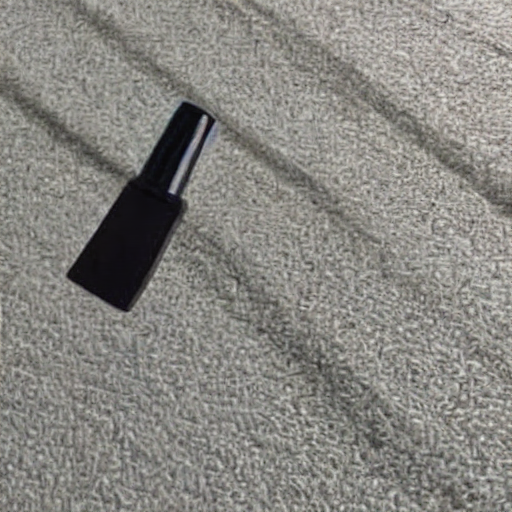

In [35]:
image2

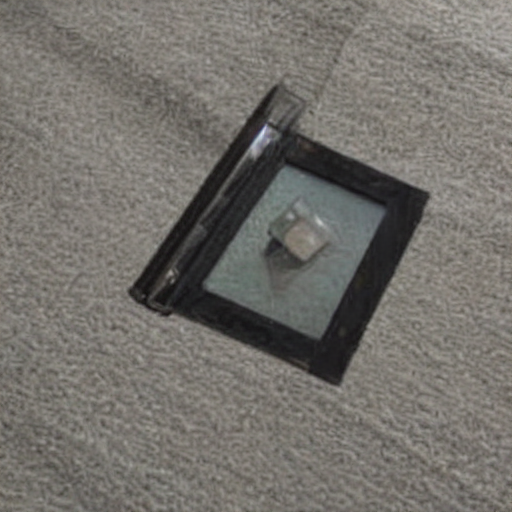

In [25]:
image

In [36]:
while True:
    pass

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_1127/2044646855.py:1 in <module>                                                  │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_1127/2044646855.py'                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt